In [14]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization,Activation
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

import pydot
import graphviz

In [15]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [16]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [17]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [18]:
print('Valor mínimo: ', x_train.min())
print('Valor máximo: ',x_train.max())

Valor mínimo:  0
Valor máximo:  255


In [19]:
# Determinar el tamaño del conjunto de entrenamiento (80% del total)
num_train = int(0.8 * x_train.shape[0])

# Dividir el conjunto de datos original de entrenamiento en un nuevo conjunto de entrenamiento y de validación
x_train, x_val = x_train[:num_train], x_train[num_train:]
y_train, y_val = y_train[:num_train], y_train[num_train:]

print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

x_train shape: (48000, 28, 28)
x_val shape: (12000, 28, 28)
y_train shape: (48000,)
y_val shape: (12000,)


In [20]:
def visualize_dataset(n,x,y):
    plt.figure(figsize=(10,10))
    for i in range(n*n):
        plt.subplot(n,n,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i], cmap=plt.get_cmap('gray'))
        plt.xlabel(y[i])
    plt.show()

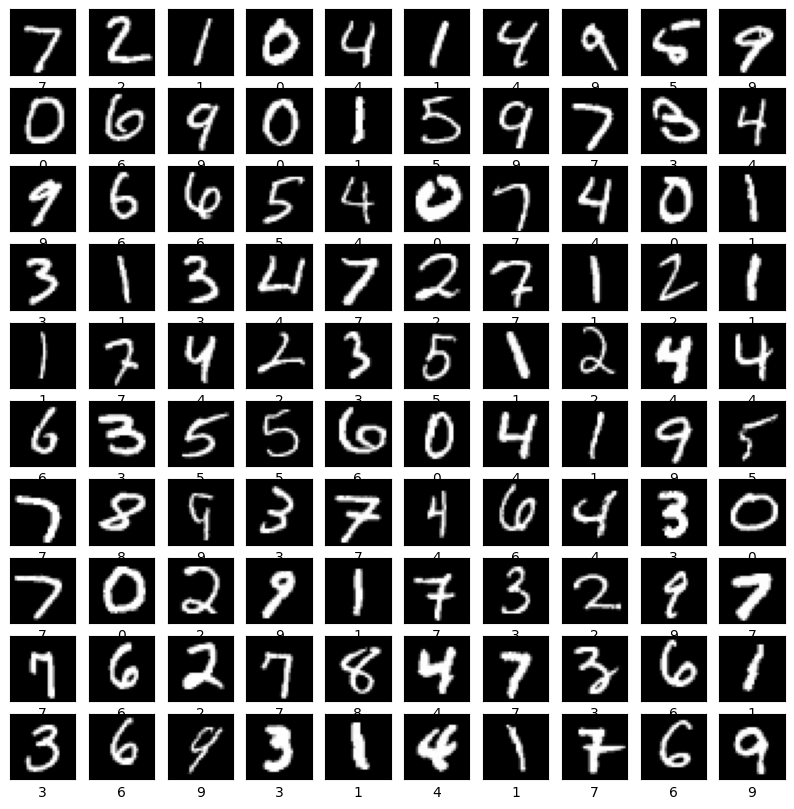

In [21]:
visualize_dataset(10, x_test, y_test)

In [22]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val/ 255.0

In [23]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
y_val = tf.keras.utils.to_categorical(y_val)

In [24]:
x_val.shape

(12000, 28, 28)

In [25]:
# Redimensionamiento de los Conjuntos de Datos
x_train = x_train.reshape(-1, 28, 28, 1)  
x_test = x_test.reshape(-1, 28, 28, 1)   
x_val = x_val.reshape(-1, 28, 28, 1)

In [26]:
# Definición del primer modelo
model_1 = Sequential()

# Capa convolucional 1
model_1.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), padding="same", kernel_regularizer=l2(0.001)))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPool2D(2, 2))
model_1.add(Dropout(0.3)) 

# Aplanamiento y capas densas
model_1.add(Flatten())
model_1.add(Dense(32, activation='relu'))
model_1.add(Dropout(0.5))

model_1.add(Dense(16, activation='relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(10, activation='softmax'))

In [32]:
# model_1.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) #optimizer, loss, metric
model_1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy']) #optimizer, loss, metric

In [33]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       1280      
                                                                 
 batch_normalization (Batch  (None, 28, 28, 128)       512       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 28, 28, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        3

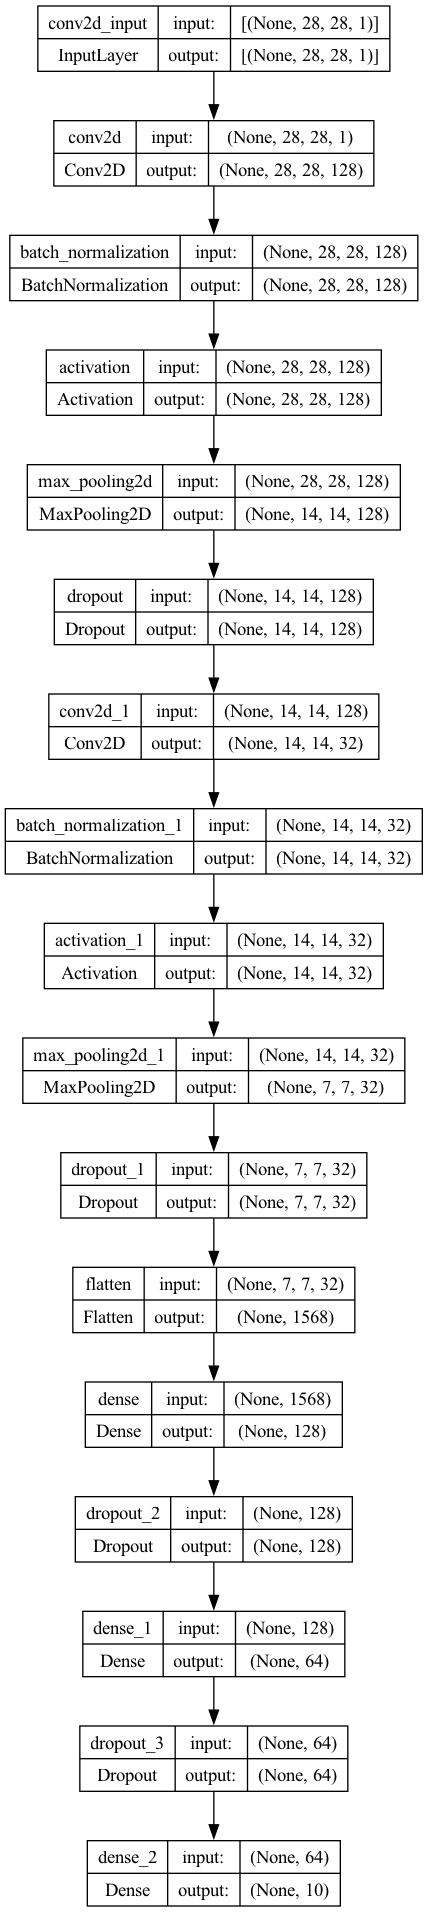

In [34]:
plot_model(model_1, show_shapes=True)

In [35]:
es = EarlyStopping(monitor='val_loss', patience=5,  mode='min',  verbose=1)
checkpoint = keras.callbacks.ModelCheckpoint("/Users/davidclemente/Documents/GitHub/MLWithFramework/best_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [37]:
history_1 = model_1.fit(x_train, y_train, validation_data=(x_val, y_val),callbacks=[es, checkpoint] ,epochs=15,verbose=1)

Epoch 1/15
1500/1500 [==============================] - ETA: 0s - loss: 0.1664 - accuracy: 0.9654
Epoch 1: val_loss did not improve from 0.09141
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1664 - accuracy: 0.9654 - val_loss: 0.0967 - val_accuracy: 0.9846
Epoch 2/15
1500/1500 [==============================] - ETA: 0s - loss: 0.1608 - accuracy: 0.9666
Epoch 2: val_loss improved from 0.09141 to 0.08971, saving model to /Users/davidclemente/Documents/GitHub/MLWithFramework/best_model_Mnist.h5
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1608 - accuracy: 0.9666 - val_loss: 0.0897 - val_accuracy: 0.9873
Epoch 3/15
1500/1500 [==============================] - ETA: 0s - loss: 0.1498 - accuracy: 0.9695
Epoch 3: val_loss did not improve from 0.08971
1500/1500 [==============================] - 22s 15ms/step - loss: 0.1498 - accuracy: 0.9695 - val_loss: 0.0938 - val_accuracy: 0.9863
Epoch 4/15
1499/1500 [============================>.] - ETA: 0s -

In [ ]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization,Activation
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

import pydot
import graphviz

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Determinar el tamaño del conjunto de entrenamiento (80% del total)
num_train = int(0.8 * x_train.shape[0])

# Dividir el conjunto de datos original de entrenamiento en un nuevo conjunto de entrenamiento y de validación
x_train, x_val = x_train[:num_train], x_train[num_train:]
y_train, y_val = y_train[:num_train], y_train[num_train:]

x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val/ 255.0

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
y_val = tf.keras.utils.to_categorical(y_val)

# Redimensionamiento de los Conjuntos de Datos
x_train = x_train.reshape(-1, 28, 28, 1)  
x_test = x_test.reshape(-1, 28, 28, 1)   
x_val = x_val.reshape(-1, 28, 28, 1)

# Definición del primer modelo
model_1 = Sequential()

# Capa convolucional 1
model_1.add(Conv2D(128, (3, 3), input_shape=(28, 28, 1), padding="same", kernel_regularizer=l2(0.001)))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPool2D(2, 2))
model_1.add(Dropout(0.3)) 

# Capa convolucional 2
model_1.add(Conv2D(32, (3, 3), padding="same", kernel_regularizer=l2(0.001)))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPool2D(2, 2))
model_1.add(Dropout(0.25))

# Aplanamiento y capas densas
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.5))

model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(10, activation='softmax'))

model_1.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) #optimizer, loss, metri

es = EarlyStopping(monitor='val_loss', patience=5,  mode='min',  verbose=1)
checkpoint = keras.callbacks.ModelCheckpoint("/Users/davidclemente/Documents/GitHub/MLWithFramework/best_model_Mnist.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

history_1 = model_1.fit(x_train, y_train, validation_data=(x_val, y_val),callbacks=[es, checkpoint] ,epochs=300,verbose=1)